#### Bibliotecas utilizadas

In [10]:
import cv2
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy import linalg

#### 1 - Carregamento dos dados

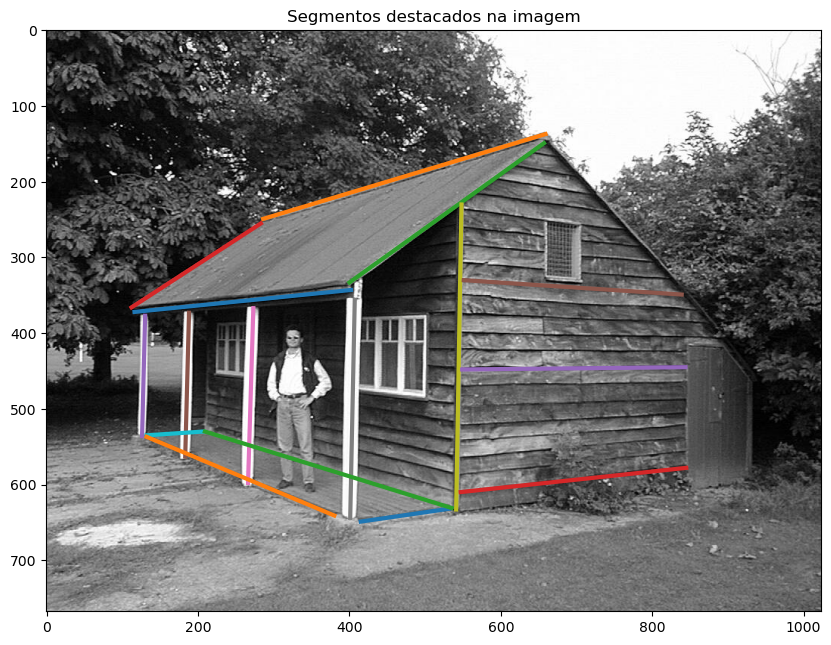

In [8]:
# Carregar os dados
data   = sio.loadmat('points_2D.mat')
points = data['points_2D'] 
image1 = cv2.imread('hutme.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  

# Exibir imagem com segmentos
plt.figure(figsize=(10, 10))
plt.imshow(image1)
for i in range(0,len(points),2):
    x1, y1, _ = points[i]
    x2, y2, _ = points[i+1]
    plt.plot([x1, x2], [y1, y2], linewidth=3)
plt.title('Segmentos destacados na imagem')
plt.show()

#### 2 - Pontos de fuga dos segmentos

##### Funções utilizadas

In [257]:
# Função que retorna o ponto de interseção entre duas linhas em coordenadas homogêneas 
def line_intersection(line_1,line_2):
    
    x_h = np.cross(line_1, line_2)
    
    if x_h[2] == 0:
        return None
    else:
        x_h = x_h / x_h[2]

    return x_h

# Função que retorna a linha que passa por dois pontos em coordenadas homogêneas
def get_line(point_1, point_2):

    point_1_homo = (point_1[0], point_1[1], 1)
    point_2_homo = (point_2[0], point_2[1], 1)
    
    if point_1_homo == point_2_homo:
        return None
        
    line = np.cross(point_1_homo, point_2_homo)

    return line

##### Cálculo dos pontos de fuga

In [260]:
line1 = get_line(points[0,0:2],points[1,0:2])  # Segmento 1
line2 = get_line(points[2,0:2],points[3,0:2])  # Segmento 2

line3 = get_line(points[4,0:2],points[5,0:2])  # Segmento 3
line4 = get_line(points[6,0:2],points[7,0:2])  # Segmento 4

line10 = get_line(points[18,0:2],points[19,0:2])  # Segmento 10
line11 = get_line(points[20,0:2],points[21,0:2])  # Segmento 11

line12 = get_line(points[22,0:2],points[23,0:2])  # Segmento 12
line13 = get_line(points[24,0:2],points[25,0:2])  # Segmento 13

line15 = get_line(points[28,0:2],points[29,0:2])  # Segmento 15
line16 = get_line(points[30,0:2],points[31,0:2])  # Segmento 16

# Pontos de fuga
vanishing_point1 = line_intersection(line1, line2)
vanishing_point2 = line_intersection(line3, line4)
vanishing_point3 = line_intersection(line10, line11)
vanishing_point4 = line_intersection(line12, line13)
vanishing_point5 = line_intersection(line15, line16)

print(f"Coordenadas XY do ponto de fuga dos segmentos 1 e 2:   {vanishing_point1[0:2]}")
print(f"Coordenadas XY do ponto de fuga dos segmentos 3 e 4:   {vanishing_point2[0:2]}")
print(f"Coordenadas XY do ponto de fuga dos segmentos 10 e 11: {vanishing_point3[0:2]}")
print(f"Coordenadas XY do ponto de fuga dos segmentos 12 e 13: {vanishing_point4[0:2]}")
print(f"Coordenadas XY do ponto de fuga dos segmentos 15 e 16: {vanishing_point5[0:2]}")

Coordenadas XY do ponto de fuga dos segmentos 1 e 2:   [-245.81729908  408.68776809]
Coordenadas XY do ponto de fuga dos segmentos 3 e 4:   [ 2703.54954035 -1316.23391216]
Coordenadas XY do ponto de fuga dos segmentos 10 e 11: [2104.7173913   403.48550725]
Coordenadas XY do ponto de fuga dos segmentos 12 e 13: [-149.68834688  418.87262873]
Coordenadas XY do ponto de fuga dos segmentos 15 e 16: [2100.47472561  432.22229093]


#### 3 - Linha do horizonte

Linha do horizonte: [-1.53871215e+01 -2.25440574e+03  9.42005585e+05]


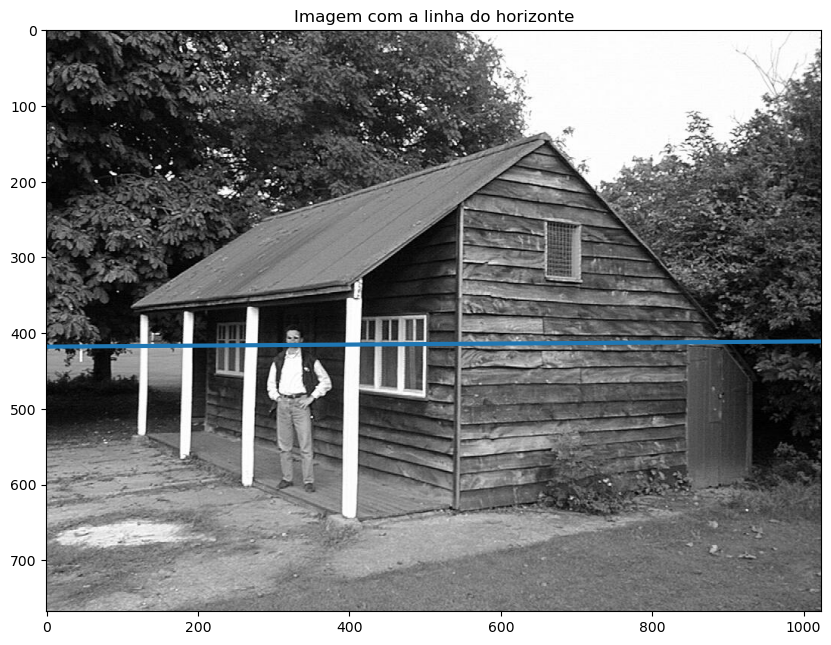

In [263]:
# Carregando a imagem
image2   = cv2.imread('hutme.jpg')
image2   = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  
img_size = image2.shape

# Linha do horizonte
l_horizonte = get_line(vanishing_point3,vanishing_point4)
print('Linha do horizonte:',l_horizonte)

# Equação da reta para a linha do horizonte
x = np.linspace(0, img_size[1]-1, 100000)
y = (-l_horizonte[0]/l_horizonte[1])*x - l_horizonte[2]/l_horizonte[1]

# Plot da linha do horizonte na imagem
plt.figure(figsize=(10, 10))
plt.imshow(image2)
plt.plot(x, y, linewidth=3)
plt.title('Imagem com a linha do horizonte')
plt.show()

##### Como a linha do horizonte representa a linha onde o plano paralelo ao plano do chão e saindo do centro da câmera intercepta o plano da imagem, além de ser os pontos no espaço que estão a mesma distância do plano do chão tanto quanto do centro da câmera, é possível inferir que a imagem foi tirada com uma ligeira inclinação de baixo pra cima, dado que a linha do horizonte esta um pouco abaixo da metade da altura da imagem e consequentemente existem mais pontos mais próximos do centro da câmera (acima da linha do horizonte) do que pontos mais próximos do plano do châo (abaixo da linha do horizonte).

#### 4 - Pontos de fuga dos segmentos 5 ao 9

##### No mundo real as linhas não se encontram, em outras palavras se encontram no infinito, na imagem é possivel calcular o ponto onde estas linhas se encontram, o ponto de fuga.

In [268]:
# Obtendo as representações homogeneas das linhas
line5 = get_line(points[8,0:2],points[9,0:2])    # Segmento 5
line6 = get_line(points[10,0:2],points[11,0:2])  # Segmento 6
line7 = get_line(points[12,0:2],points[13,0:2])  # Segmento 7
line8 = get_line(points[14,0:2],points[15,0:2])  # Segmento 8
line9 = get_line(points[16,0:2],points[17,0:2])  # Segmento 9

# Empilhando as linhas em uma matriz
A = [line5,
     line6,
     line7,
     line8,
     line9]

# Cálculo do espaço nulo a direita da matriz A usando SVD, o espaço nulo a direita é ponto de interseção entre todas as linhas
A = np.array(A)
U, S, Vt = linalg.svd(A)
x_hat = Vt[-1]
x_hat = x_hat/x_hat[2]

print(f"Ponto de fuga dos segmentos 5 ao 9:   {x_hat}")

Ponto de fuga dos segmentos 5 ao 9:   [ 1.16982331e+03 -3.50096084e+04  1.00000000e+00]


#### 5 - Altura do homem

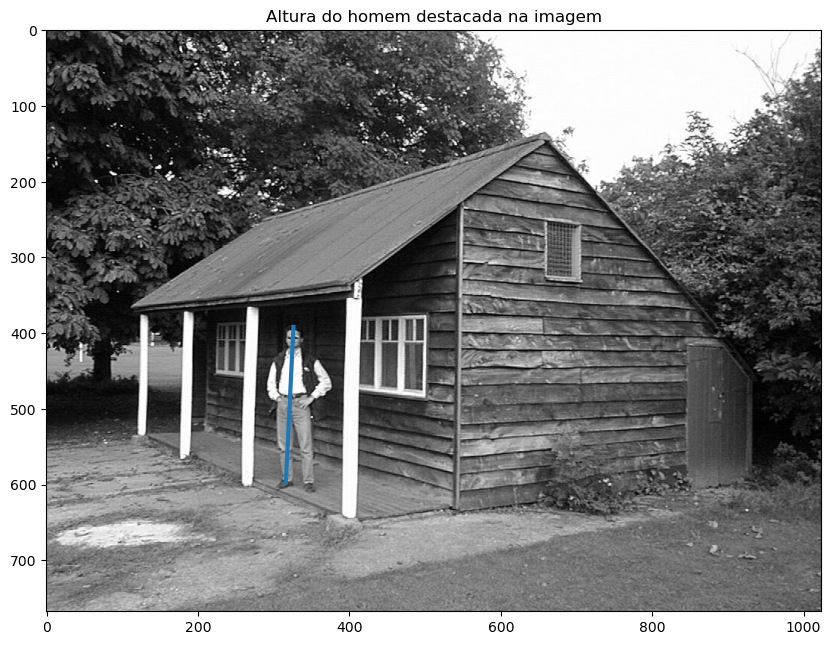

In [271]:
# Carregando a imagem
image3 = cv2.imread('hutme.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)  

# Coordenadas obtidas manualmente
x1 = 326
y1 = 392
x2 = 316
y2 = 597

# Plot da linha ligando os dois pontos
plt.figure(figsize=(10, 10))
plt.imshow(image3)
plt.plot([x1, x2], [y1, y2], linewidth=3)
plt.title('Altura do homem destacada na imagem')
plt.show()

##### Algoritmo 8.1 do livro

In [274]:
# Coordenadas dos pontos que formam as linhas
b1 = np.array([x2, y2, 1])    # Base do homem, ponto 1
t1 = np.array([x1, y1, 1])    # Topo do homem, ponto 1
b2 = np.array([541, 633, 1])  # Base do segmento 9, ponto 2
t2 = np.array([548, 230, 1])  # Topo do segmento 9, ponto 2

# Cálculo das linhas 
height_line1 = get_line(b1[0:2],t1[0:2])
height_line2 = get_line(b2[0:2],t2[0:2])

# Ponto de fuga
v = line_intersection(height_line1,height_line2)

# Linha do horizonte
l = np.array([-1.53871215e+01, -2.25440574e+03, 9.42005585e+05])

# Calcula a linha l2 usando o ponto de fuga e a base b2
l2 = np.cross(v1, b2)

# Interseção u (entre b1-b2 e linha do horizonte)
u = np.cross(np.cross(b1, b2), l)
u = u / u[2] 

# Projeção de t1 na linha l2
t1_til = np.cross(np.cross(t1, u), l2)
t1_til = t1_til / t1_til[2] 

H         = np.array([[1, 0], [1, -v[1]]]) # Matriz para retificação 
t1_tilret = H @ t1_til[1:3]                # Retifica t1 projetado
t2_ret    = H @ t2[1:3]                    # Retifica t2
v_ret     = H @ v[1:3]                     # Retifica v

# Cálculo da razão das alturas
d = 294.3 / ((t1_tilret[0] * (v_ret[0] - t2_ret[0])) / (t2_ret[0] * (v_ret[0] - t1_tilret[0])) )
print(f"Altura estimada do homem: {d:.2f}cm")

Altura estimada do homem: 179.47cm


#### 6 - Altura da coluna de sustentação

##### Algoritmo 8.1 do livro

In [278]:
# Coordenadas dos pontos que formam as linhas
b1 = np.array([401, 644, 1])    # Base do segmento 8, ponto 1
t1 = np.array([407, 356, 1])    # Topo do segmento 8, ponto 1
b2 = np.array([541, 633, 1])    # Base do segmento 9, ponto 2
t2 = np.array([548, 230, 1])    # Topo do segmento 9, ponto 2

# Cálculo das linhas 
height_line1 = get_line(b1[0:2],t1[0:2])
height_line2 = get_line(b2[0:2],t2[0:2])

# Ponto de fuga
v = line_intersection(height_line1,height_line2)

# Linha do horizonte
l = np.array([-1.53871215e+01, -2.25440574e+03, 9.42005585e+05])

# Calcula a linha l2 usando o ponto de fuga e a base b2
l2 = np.cross(v1, b2)

# Interseção u (entre b1-b2 e linha do horizonte)
u = np.cross(np.cross(b1, b2), l)
u = u / u[2] 

# Projeção de t1 na linha l2
t1_til = np.cross(np.cross(t1, u), l2)
t1_til = t1_til / t1_til[2] 

H         = np.array([[1, 0], [1, -v[1]]]) # Matriz para retificação 
t1_tilret = H @ t1_til[1:3]                # Retifica t1 projetado
t2_ret    = H @ t2[1:3]                    # Retifica t2
v_ret     = H @ v[1:3]                     # Retifica v

# Cálculo da razão das alturas
d = 294.3 / ((t1_tilret[0] * (v_ret[0] - t2_ret[0])) / (t2_ret[0] * (v_ret[0] - t1_tilret[0])) )
print(f"Altura estimada da coluna de sustentação: {d:.2f}cm")

Altura estimada da coluna de sustentação: 189.88cm
